# IDEALISTA (MADRID) ANALYSIS

## Introduction

In [ ]:
Idealista is an online real estate platform that provides comprehensive listings for properties across different regions.
The platform caters to both buyers and renters, offering a diverse range of properties to suit different budgets and needs.
Additionally, Idealista provides valuable insights into the real estate market, trends, and pricing dynamics.

## Description

-- COLUMN DESCRIPTION


  * 1) url: The URL of the property listing.
  * 2) listingUrl: The URL of the page where the listing is found.
  * 3) title: The title of the property listing.
  * 4) id: The unique identifier for the property.
  * 5) price: The listed price of the property.
  * 6) baths: The number of bathrooms in the property.
  * 7) rooms: The number of rooms in the property.
  * 8) sqft: The square footage of the property.
  * 9) description: A description of the property.
  * 10) address: The address of the property.
  * 11) typology: The type of property (e.g., Pisos).
  * 12) advertiserProfessionalName: The professional name of the advertiser.
  * 13) advertiserName: The name of the advertiser.


## Table of Contents

* Import Libraries
* Import Data
* Data understanding
* Data Preparation
* Asking data
* Data Analysis & Visualization
* Conclusions
* Sources

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import warnings

import geopandas as gpd  # Allows us to work with geospatial data.
from mpl_toolkits.axes_grid1 import make_axes_locatable # Allows us to adjust and customize the locations of axes in plots.

warnings.filterwarnings("ignore")

### Data Understanding

In [2]:
df = pd.read_csv(r"C:\Users\alber\OneDrive\Escritorio\Python_portfolio\idealista_madrid_Project.csv")

In [3]:
# Preview any random rows to ensure about the data quality.

df.sample(7, random_state = 12345)

,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
733,https://www.idealista.com/inmueble/102967577/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,102967577,730000,2,2,125,Gilmar Real Estate Viso-Chamartín vende elegan...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
517,https://www.idealista.com/inmueble/100390518/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en paseo de la castellana,100390518,1499000,3,3,187,Piso en venta exterior con terraza en Paseo de...,"Cuzco-Castillejos, Madrid",Pisos,Walter Haus Chamartin,Walter Haus Madrid
824,https://www.idealista.com/inmueble/103666203/,https://www.idealista.com/venta-viviendas/madr...,"Piso en venta en avenida de América, 37",103666203,1200000,3,3,236,DIZA consultores les presenta vivienda de lujo...,"Prosperidad, Madrid",Pisos,DIZA Consultores Inmobiliaria - Propiedades de...,DIZA Consultores Inmobiliaria - Propiedades de...
391,https://www.idealista.com/inmueble/101759629/,https://www.idealista.com/venta-viviendas/madr...,Dúplex en venta en San Juan Bautista,101759629,920000,4,5,217,Magnífico Dúplex en Arturo SoriaEn el corazón ...,"Ciudad Lineal, Madrid",Pisos,Madrid MMC - Conde de Orgaz,Engel & Völkers Madrid
672,https://www.idealista.com/inmueble/102962688/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Cuatro Caminos,102962688,1290000,3,3,211,Fantástico piso de diseño en Cuatro CaminosEng...,"Tetuán, Madrid",Pisos,Madrid MMC - Tetuán y Fuencarral - S6,Engel & Völkers Madrid
41,https://www.idealista.com/inmueble/104053094/,https://www.idealista.com/venta-viviendas/madr...,Casa o chalet independiente en venta en Ciudad...,104053094,2100000,7,6,334,Ines Coca de GV | CIUDAD JARDIN comercializa e...,"Chamartín, Madrid",Independientes,Ines Coca,GV | Real Estate
33,https://www.idealista.com/inmueble/93496901/,https://www.idealista.com/venta-viviendas/madr...,Chalet adosado en venta en calle del Marqués d...,93496901,1237000,7,8,485,"Espléndido chalet de lujo en Peñagrande, con 4...","Peñagrande, Madrid",Independientes,De Salas Mirasierra,De Salas Mirasierra - Puerta de Hierro


In [4]:
# Preview the first 5 rows.

df.head()

,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


In [5]:
# Shape of dataset

df.shape

(915, 13)

In [6]:
# A summary of the dataset.

# Memory_usage='deep' is a parameter that triggers a more detailed calculation of memory usage that takes into account not only
# the size of the data itself but also the size of the objects to which the data refers.

df.info(memory_usage = "deep")

# We observe there are hardly any null values.
# It won't be necessary to drop them since null values represent less than 1 % of the total and, 
# we probably won't use the "description" column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         915 non-null    object
 1   listingUrl                  915 non-null    object
 2   title                       915 non-null    object
 3   id                          915 non-null    int64 
 4   price                       915 non-null    int64 
 5   baths                       915 non-null    int64 
 6   rooms                       915 non-null    int64 
 7   sqft                        915 non-null    int64 
 8   description                 914 non-null    object
 9   address                     915 non-null    object
 10  typology                    915 non-null    object
 11  advertiserProfessionalName  915 non-null    object
 12  advertiserName              915 non-null    object
dtypes: int64(5), object(8)
memory usage: 2.9 MB


In [7]:
# A statistical summary, which provides a deeper insight.

df.describe().round(2)

,id,price,baths,rooms,sqft
count,9.150000e+02,915.00,915.00,915.00,915.00
mean,1.020578e+08,1290575.26,2.90,3.47,217.24
std,5.338810e+06,1036640.03,1.63,1.59,191.75
min,2.547319e+07,122000.00,1.00,0.00,14.00
25%,1.019509e+08,625000.00,2.00,2.00,104.00
50%,1.031510e+08,990000.00,3.00,3.00,158.00
75%,1.037703e+08,1650000.00,4.00,4.00,264.00
max,1.042055e+08,8900000.00,12.00,12.00,1768.00


* We can observe the average property price exceeds the one million. 
* Another reason may be the average nº of baths is almost three and, the average of rooms is 4.
* In a further analysis, we will find out if this is because of the distribution of the data or something else.
* A correlation may be useful since it will show us, which variables are closely correlated with price increases or decreases.
* We can see the propertie with the lowest price does not have any bedrooms, that's due to it can be a studio; properties that     are common in Madrid.

### Data Preparation

In [8]:
# Checking duplicated values.

df.duplicated().sum()

# There is no any duplicated values in the dataset.

0

In [9]:
df.columns

# We are not using some columns.

Index(['url', 'listingUrl', 'title', 'id', 'price', 'baths', 'rooms', 'sqft',
       'description', 'address', 'typology', 'advertiserProfessionalName',
       'advertiserName'],
      dtype='object')

In [10]:
# Let's remove unnecessary columns.

df = df.drop(['url', 'listingUrl', 'title', 'id', 'description', 'advertiserProfessionalName', 'advertiserName'  ], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     915 non-null    int64 
 1   baths     915 non-null    int64 
 2   rooms     915 non-null    int64 
 3   sqft      915 non-null    int64 
 4   address   915 non-null    object
 5   typology  915 non-null    object
dtypes: int64(4), object(2)
memory usage: 43.0+ KB


In [11]:
# In typology column the term "Independientes",  may be ambiguous, so let's change it into "viviendas independientes".
# Also, let's avoid capital letters.


df['typology'] = df['typology'].replace('Independientes', 'vivienda independiente')
df['typology'] = df['typology'].replace('Pisos', 'piso')

df['typology'].unique()

array(['piso', 'vivienda independiente'], dtype=object)

In [12]:
df.columns

Index(['price', 'baths', 'rooms', 'sqft', 'address', 'typology'], dtype='object')

In [13]:
# Let's create a new dataset to check correlation between values.
# Column typology could be useful but it's object type so let' change it to integrer.


# let's apply a hot-encoding to create a new column that replaces the object values in typology by numeric values.


df_corr = pd.get_dummies(df, columns=['typology'])
df_corr['typology'] = df_corr['typology_piso'] * 0 + df_corr['typology_vivienda independiente'] * 1

# Delete columns 'typology_floor' and 'typology_independent since they are not necessary
df_corr.drop(['typology_piso', 'typology_vivienda independiente'], axis=1, inplace=True)

# Removing the address column to see the correlation.
df_corr = df_corr.drop(['address'], axis=1)

df_corr.head()

,price,baths,rooms,sqft,typology
0,1920000,3,3,183,0
1,1995000,3,3,170,0
2,1300000,3,4,270,0
3,1650000,3,3,248,0
4,1590750,3,3,116,0


In [14]:
df_corr.corr()

,price,baths,rooms,sqft,typology
price,1.000000,0.691625,0.557189,0.681762,0.369632
baths,0.691625,1.000000,0.770765,0.818733,0.656804
rooms,0.557189,0.770765,1.000000,0.712655,0.538780
sqft,0.681762,0.818733,0.712655,1.000000,0.639377
typology,0.369632,0.656804,0.538780,0.639377,1.000000


<Axes: >

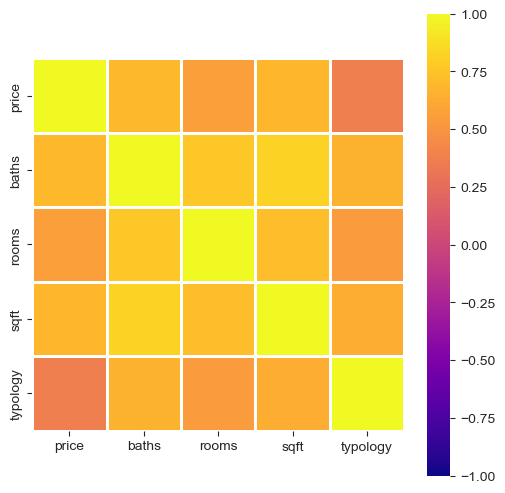

In [15]:
# Let's visualize a correlation matrix to make things clearer.

corr = df_corr.corr()

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr,cmap='plasma',square= True, linewidths= 1, vmin = -1, vmax = 1)

Conclusions: 
 
 * As we expected, The 'price' column shows a moderate positive correlation with 'baths', 'rooms' and 'sqft'. This suggests that    as price increases, the number of baths, rooms and sqft of the property tends to increase as well.
 ___
 
 * The columns 'baths', 'rooms' and 'sqft' also show positive correlations with each other, which is reasonable since there is      likely to be a relationship between the number of bathrooms, the number of rooms and the size of the property.
 ___
 
 * It is striking that the nº of baths tends to increase the price more than the number of rooms does or even a bit more than
   the sqft.
 ___
 
 * The correlation between 'typology' and the other variables is lower compared to the correlations between the other variables.
 

In [16]:
# Last but not least, if we wanted to display the average price in each area of Madrid, it would be chaotic due to the 
# several number of locations.

# Let's categorize them into districts.

district = {
    
"Centro": ['Malasaña-Universidad, Madrid', 'Centro, Madrid', 'Palacio, Madrid', 'Lavapiés-Embajadores, Madrid',
           'Huertas-Cortes, Madrid','Chueca-Justicia, Madrid', 'Sol, Madrid'],
    
"Arganzuela": ['Palos de Moguer, Madrid', 'Imperial, Madrid', 'Acacias, Madrid', 'Chopera, Madrid', 'Legazpi, Madrid',
               'Delicias, Madrid', 'Arganzuela, Madrid'],
    
"Retiro": ["Retiro, Madrid", "Pacífico, Madrid", "Estrella, Madrid", "Ibiza, Madrid", "Jerónimos, Madrid",
           "Niño Jesús, Madrid"],
    
"Salamanca": ["Barrio de Salamanca, Madrid", "Recoletos, Madrid", "Goya, Madrid", "Fuente del Berro, Madrid",
              "Guindalera, Madrid", "Castellana, Madrid", "Lista, Madrid"],
    
"Chamartín": ["Chamartín, Madrid", "El Viso, Madrid", "Prosperidad, Madrid", "Ciudad Jardín, Madrid",
              "Bernabéu-Hispanoamérica, Madrid", "Nueva España, Madrid", "Castilla, Madrid"],
    
"Tetuán": ['Tetuán, Madrid', 'Bellas Vistas, Madrid', 'Cuatro Caminos, Madrid', 'Cuzco-Castillejos, Madrid',
           'Ventilla-Almenara, Madrid', 'Valdeacederas, Madrid', 'Berruguete, Madrid'],
    
"Chamberí": ['Chamberí, Madrid', 'Gaztambide, Madrid', 'Arapiles, Madrid', 'Trafalgar, Madrid', 'Almagro, Madrid',
             'Nuevos Ministerios-Ríos Rosas, Madrid', 'Vallehermoso, Madrid'],
    
"Fuencarral-El Pardo": ['Fuencarral, Madrid', 'Peñagrande, Madrid', 'La Paz, Madrid', 'Mirasierra, Madrid',
                        'Fuentelarreina, Madrid'],
    
"Moncloa-Aravaca": ['Moncloa, Madrid', 'Argüelles, Madrid', 'Ciudad Universitaria, Madrid', 'Valdezarza, Madrid',
                    'Valdemarín, Madrid', 'El Plantío, Madrid', 'Aravaca, Madrid'],
    
"Latina": ['Latina, Madrid', 'Puerta del Ángel, Madrid', 'Campamento, Madrid'],
    
"Carabanchel": ['Pau de Carabanchel, Madrid', 'Comillas, Madrid', 'Opañel, Madrid', 'San Isidro, Madrid',
                'Vista Alegre, Madrid', 'Buena Vista, Madrid'],
    
"Usera": ['San Fermín, Madrid', 'Almendrales, Madrid', 'Zofío, Madrid', '12 de Octubre-Orcasur, Madrid'],
    
"Puente de Vallecas": ['Puente de Vallecas, Madrid', 'San Diego, Madrid'],
    
"Moratalaz": ['Moratalaz, Madrid'], 
    
"Ciudad Lineal": ["Ciudad Lineal, Madrid", "Ventas, Madrid", "Pueblo Nuevo, Madrid", "Quintana, Madrid",
                  "Concepción, Madrid", "San Juan Bautista, Madrid", "Colina, Madrid", "Costillares, Madrid"],
    
"Hortaleza": ["Hortaleza, Madrid", "Virgen del Cortijo - Manoteras, Madrid", "Valdebebas - Valdefuentes, Madrid",
              "Sanchinarro, Madrid", "Conde Orgaz-Piovera, Madrid", "Palomas, Madrid", "Canillas, Madrid",
              "Pinar del Rey, Madrid"],
    
"Villaverde": ["Butarque, Madrid", "Los Ángeles, Madrid"],
    
"Villa de Vallecas": ["Ensanche de Vallecas - La Gavia, Madrid"],
    
"Vicálvaro": ["El Cañaveral, Madrid"],
    
"San Blas-Canillejas": ["San Blas, Madrid", "Simancas, Madrid", "Amposta, Madrid", "Rejas, Madrid", "Canillejas, Madrid",
                        "Salvador, Madrid"],
    
"Barajas": ["Casco Histórico de Barajas, Madrid", "Timón, Madrid", "Barajas, Madrid"]
   
}

In [17]:
# Adding a new column called "district" and removing the "address" column.

df['district'] = ''

for distrito, barrios in district.items():
    df.loc[df['address'].isin(barrios), 'district'] = distrito
    
df = df.drop(["address" ], axis=1)
   

df.head()

,price,baths,rooms,sqft,typology,district
0,1920000,3,3,183,piso,Salamanca
1,1995000,3,3,170,piso,Salamanca
2,1300000,3,4,270,piso,Hortaleza
3,1650000,3,3,248,piso,Chamartín
4,1590750,3,3,116,piso,Salamanca


* Note: Madrid is organized by districts (e.g. Centro), which are composed of neighborhoods (e.g. Sol).

### Asking Data

###### Now that we have the data ready, let's ask the following questions:

   -- Distribution of each Typology:
   * What is the percentage of detached houses (vivienda independiente) and apartments (pisos) for sale?.
   
   -- By District:
   * What is the average price of properties in each district of Madrid?.
   * Average price by typology and District.
   * Sqft average price in each district.
   
   -- By Feature:
   * What is the average price for apartments and detached houses according to nº of bathrooms?.
   * What is the average price for apartments and detached houses according to nº of rooms?. 

### Data Analysis & Visualization

#### Distribution of each Typology:

###### ---What is the percentage of detached houses (vivienda independiente) and apartments (pisos) for sale?.

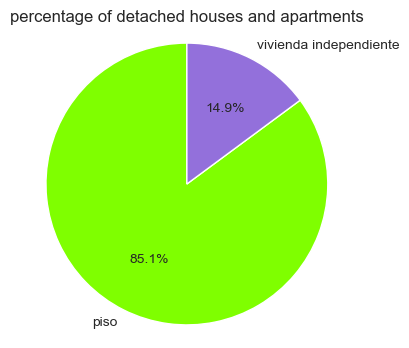

In [18]:

typology_counts = df['typology'].value_counts()

labels = typology_counts.index.tolist()
sizes = typology_counts.values.tolist()
colors = ['#7fff00', 'mediumpurple']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('percentage of detached houses and apartments')
plt.axis('equal') 

plt.show()

* This overgrown distribution is a direct result of the high population density of the area studied, where the demand for more compact and affordable properties is greater.

#### By District:

##### ---What is the average price of properties in each district of Madrid?.

In [22]:
# Let's use a pivot table to find out the exact average price in each district.

pivot_district = pd.pivot_table(df, values='price', index='district', aggfunc='mean').sort_values(by='price', ascending=False)

pivot_district.rename(columns={"price":"avg_price"}, inplace = True) # Changing the name of "price" column.
pivot_district["avg_price"] = pivot_district["avg_price"].map('€ {:,.2f}'.format) # Changing the format of the prices.

pivot_district

,avg_price
district,
Chamartín,"€ 1,711,365.18"
Salamanca,"€ 1,653,689.81"
Hortaleza,"€ 1,617,848.84"
Moncloa-Aravaca,"€ 1,605,495.00"
Chamberí,"€ 1,497,061.22"
Fuencarral-El Pardo,"€ 1,281,212.77"
Centro,"€ 946,661.06"
Retiro,"€ 921,722.73"
Tetuán,"€ 806,453.49"


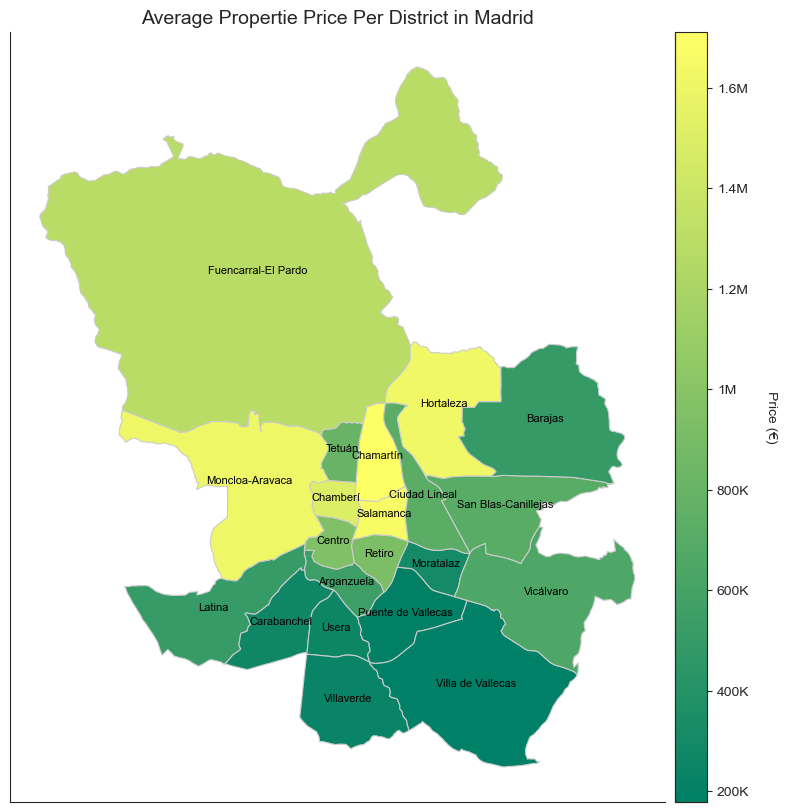

In [23]:
# Creating a map visual to display average prices.

# To load the shapefile of the districts of Madrid.
distritos_shapefile = r"C:\Users\alber\OneDrive\Escritorio\Python_portfolio\Distritos.zip"
distritos = gpd.read_file(distritos_shapefile)

# Some districts do not appear on the map due to differences in spelling. Let's fix them.
distritos['NOMBRE'] = distritos['NOMBRE'].str.replace(' - ', '-')

# To calculate the avg price and merge the average price data with the shapefile of the districts.
precio_medio_por_distrito = df.groupby('district')['price'].mean().reset_index()
distritos_precios = distritos.merge(precio_medio_por_distrito, how='left', left_on='NOMBRE', right_on='district')

# Creating the map.
fig, ax = plt.subplots(figsize=(12, 10))
distritos_precios.plot(column='price', cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=distritos_precios['price'].min(), 
vmax=distritos_precios['price'].max()))
sm._A = []

# Editing the legend and the colorbar.
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Price (€)', rotation=270, labelpad=20)
plt.gca().set_yticklabels(["0", "200K", "400K", "600K", "800K", "1M", "1.2M","1.4M", "1.6M"])

# Adding the name of each district.
for idx, row in distritos_precios.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NOMBRE'], fontsize=8, ha='center', color="black")
    
# Editing the Title.
ax.set_title('Average Propertie Price Per District in Madrid', fontdict={'fontsize': '14', 'fontweight': '3'})
ax.set_xticks([])
ax.set_yticks([])

# To remove the top and right lines.
sns.despine()

plt.show()

*  Chamartín, Salamanca, Moncloa and Hortaleza have the highest average prices, all exceeding €1,500,000 (They happen to be        located in more central and exclusive areas of the city or very near the downtown).
* Districts with lowest prices such as Villaverde o Villa de Vallecas tend to be in peripheral areas.
* We observe a large variation in median prices between districts, from over €1,700,000 in Chamartín to around €179,000 in Villa   de Vallecas.

#### ---Average price by typology and District.

In [26]:
pivot_typology = (pd.pivot_table(df, values='price', index=['district', 'typology'], aggfunc='mean')
                                 .sort_values(by='district'))
                 
pivot_typology.rename(columns={"price":"avg_price"}, inplace = True) # Changing the name of "price" column.
pivot_typology["avg_price"] = pivot_typology["avg_price"].map('€ {:,.2f}'.format) # Changing the format of the prices.

pivot_typology

avg_price
district            typology                              
Arganzuela          piso                      € 507,058.82
                    vivienda independiente  € 1,250,000.00
Barajas             piso                      € 326,750.00
                    vivienda independiente    € 845,000.00
Carabanchel         piso                      € 272,690.00
Centro              piso                      € 946,661.06
Chamartín           piso                    € 1,361,807.42
                    vivienda independiente  € 2,790,434.78
Chamberí            piso                    € 1,497,061.22
Ciudad Lineal       piso                      € 721,559.51
                    vivienda independiente    € 884,500.00
Fuencarral-El Pardo piso                      € 910,689.66
                    vivienda independiente  € 1,878,166.67
Hortaleza           vivienda independiente  € 2,244,086.96
                    piso                      € 897,675.00
Latina              piso                      € 503,666.67
Moncloa-Aravaca     piso                    € 1,002,346.67
                    vivienda independiente  € 2,380,971.43
Moratalaz           piso                      € 300,000.00
Puente de Vallecas  piso                      € 188,750.00
Retiro              piso                      € 921,722.73
Salamanca           piso                    € 1,653,689.81
San Blas-Canillejas piso                      € 370,015.38
                    vivienda independiente  € 1,212,422.22
Tetuán              piso                      € 806,453.49
Usera               piso                      € 259,833.33
Vicálvaro           piso                      € 648,000.00
Villa de Vallecas   piso                      € 179,000.00
Villaverde          piso                      € 236,333.33

* Note: Once we change the format of the "price" column, the data type changes into object, so we have to keep this into           account, when we want to create a visual with this pivot table.

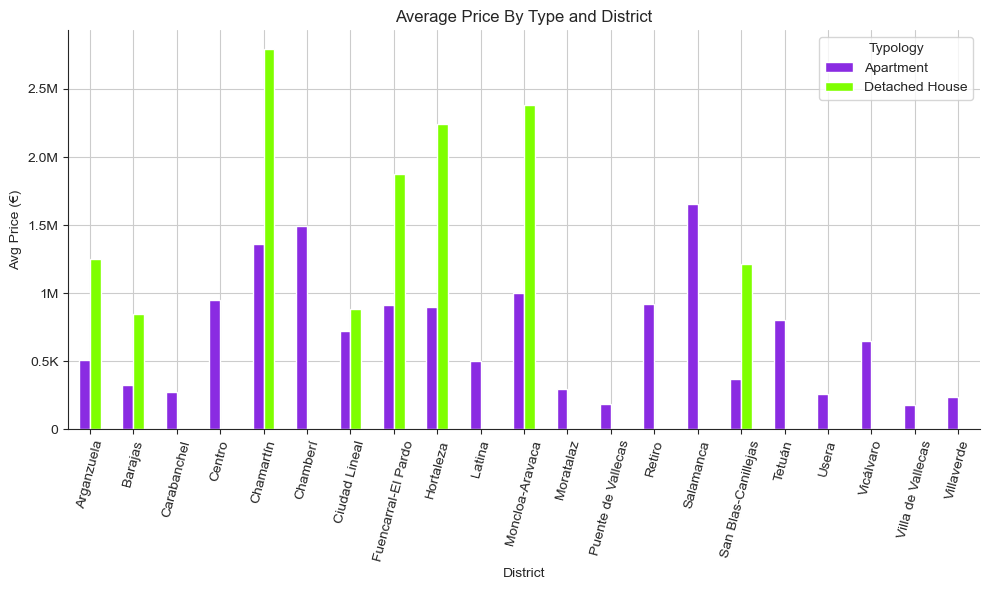

In [25]:
# Let's create a bar chart to display results.

# Rearrange the DataFrame to have typologies as columns and districts as indexes.
pivot_table =pivot_typology.unstack(level='typology')
colors = {'Vivienda independiente':'#8a2be2', 'Piso': '#7fff00'}

#Creating the chart
pivot_table.plot(kind='bar', figsize=(10, 6), color =colors.values())
plt.title('Average Price By Type and District')
plt.xlabel('District')
plt.ylabel('Avg Price (€)')
plt.legend(['Apartment', 'Detached House'], title='Typology')
plt.xticks(rotation=75)  

plt.grid(linestyle='-')  
plt.gca().set_yticklabels(["0","0.5K", "1M", "1.5M", "2.0M", "2.5M", "3.0M"])
plt.tight_layout()

sns.despine()
plt.show()

* In general, the average price of apartments tend to be more uniform compared to detached houses. 
* As we saw before, Chamartín is the most expensive district with an average detached house price close to 2 million of €.         However, we find a higher average apartment prices in districts like Chamberí and Salamanca.
* Compared to other peripheral districts, Barajas and San Blas-Canillejas have higher average prices than others such as           Carabanchel or Villaverde. This is due to the fact that they have very good transport connections, including the Adolfo Suárez   Madrid-Barajas Airport and that San Blas-Canillejas is very close to the IFEMA fairgrounds.
* This price distribution is interesting when making a decision to buy or invest in property. Neighborhoods such as Vicálvaro,     Villa de Vallecas or Usera offer lower prices, which may entail less risk when using them as passive income, whereas more         luxurious neighborhoods such as Chamberí carry a higher risk as fewer people have access to them.

#### ---Sqft average price in each district.

In [27]:
# Calculating the sqft average price in each district.

pivot_sqft = (df.groupby('district')['price'].mean() / df.groupby('district')['sqft']
              .mean()).round(2).sort_values(ascending=False)

# Puedes imprimir el resultado o trabajar con él según necesites
pivot_sqft 


district
Salamanca              9582.49
Chamberí               7670.41
Centro                 7220.91
Chamartín              7006.46
Retiro                 6477.53
Tetuán                 5459.30
Arganzuela             4655.66
Hortaleza              4512.54
Ciudad Lineal          4090.94
Moncloa-Aravaca        4034.16
Latina                 4007.96
Fuencarral-El Pardo    3712.06
San Blas-Canillejas    3300.17
Usera                  3074.95
Moratalaz              3061.22
Vicálvaro              3000.00
Carabanchel            2941.64
Barajas                2892.86
Villa de Vallecas      2521.13
Villaverde             2324.59
Puente de Vallecas     1855.04
dtype: float64

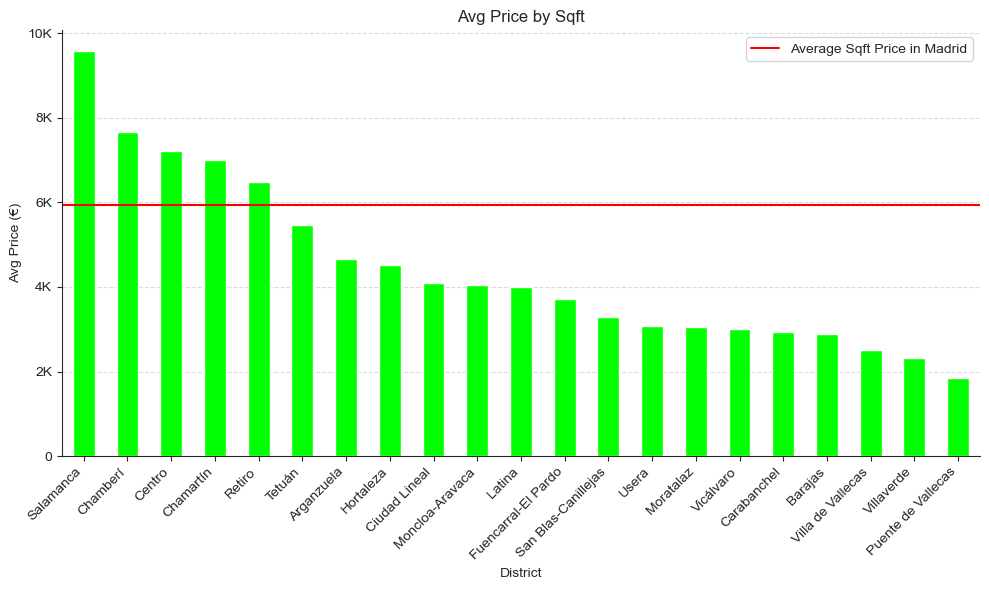

In [28]:
# Creating a bar chart to better display it.

# Calcula el precio real medio por sqft en Madrid.
precio_medio_sqft_madrid = df['price'].mean() / df['sqft'].mean()

# Creating the chart.
plt.figure(figsize=(10, 6))
pivot_sqft.plot(kind='bar', color='lime')
plt.title('Avg Price by Sqft')
plt.xlabel('District')
plt.ylabel('Avg Price (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding an average line of the general sqft avg price in Madrid.
# Let's calculate the average price (We are adding an average line).
madrid_avg = df['price'].mean() / df['sqft'].mean()
plt.axhline(y=madrid_avg, color='red', linestyle='-', label='Average Sqft Price in Madrid')
plt.legend()

# Ajusta las etiquetas del eje y
plt.gca().set_yticklabels(["0", "2K", "4K", "6K", "8K", "10K"])
plt.tight_layout()

sns.despine()
plt.show()

* The red line stands for the sqft average price in Madrid, which is 5940.83 €.
* "Premium" districts such us Salamanca, Chamberí or Centro ouweeight the price by far.
* It's interesting to observe districts such us Puente de Vallecas or Villaverde have much lower sqft prices, which is tempting   for investers.

#### By Feature:

##### ---What is the average price for apartments and detached houses according to nº of bathrooms?.

In [115]:
# Using a pivot table to take a look at avg prices according to nº of baths.

pivot_baths = (pd.pivot_table(df, values='price', index=['typology', 'baths'], aggfunc='mean')
                                 .sort_values(by='baths', ascending=False))

pivot_baths["price"] = pivot_baths["price"].map('€ {:,.2f}'.format) # Changing the format of the prices.              
              
pivot_baths

price
typology               baths                
vivienda independiente 12     € 2,900,000.00
                       11     € 2,500,000.00
                       10     € 3,155,000.00
                       9      € 3,983,333.33
                       8      € 3,827,142.86
                       7      € 2,747,642.86
                       6      € 2,521,548.39
piso                   6      € 3,950,000.00
                       5      € 2,917,257.14
vivienda independiente 5      € 1,953,583.33
                       4      € 1,657,560.00
piso                   4      € 1,886,408.42
vivienda independiente 3      € 1,030,983.33
piso                   3      € 1,441,043.85
                       2        € 805,657.77
vivienda independiente 2      € 1,930,000.00
piso                   1        € 411,211.84

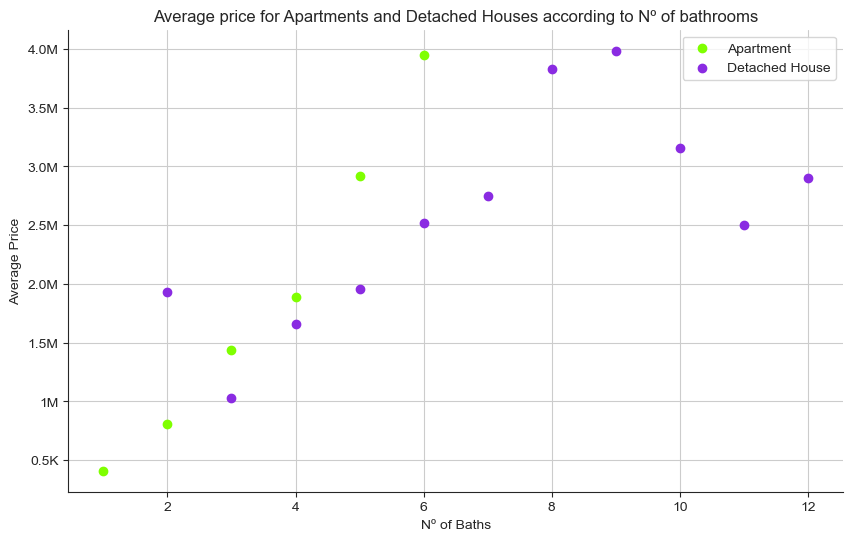

In [114]:
# Filtering data to only obtain avg prices of each category.
pisos = pivot_baths.loc['piso']
viviendas_independientes = pivot_baths.loc['vivienda independiente']

# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(pisos.index, pisos['price'], color='#7fff00', label='Apartment')
plt.scatter(viviendas_independientes.index, viviendas_independientes['price'], color='#8a2be2', label='Detached House')
plt.xlabel('Nº of Baths')
plt.ylabel('Average Price')
plt.title('Average price for Apartments and Detached Houses according to Nº of bathrooms')

plt.gca().set_yticklabels(["0", "0.5K", "1M", "1.5M", "2.0M", "2.5M", "3.0M","3.5M", "4.0M"])

plt.legend()
plt.grid(True)

sns.despine()
plt.show()

* We can observe an outlier in apartments with 6 baths, this is due to their location. All of them are located in the best         districts of Madrid. Most of properties are detached houses but there is an apartment in Salamanca that exceed 8 million so     that could explain the higher average price compared to the another typology.
* Highest prices in apartments with 3 or 4 baths than in detached houses are simply explained by data volume that plays a factor   here. It's interesting to point out that apartments with 4 baths are significantly more expensive than apartments with 3         baths.

* Except for detached houses with 8 baths, which data volume is larger, this kind of properties are more expenive when they have   9 baths, even then the amount of listed properties are the same. It can be explained by the area they are withing the           district. Moncloa has exclusive areas that are near faculties or with breathtaking views of Madrid.

In [101]:
# I created this dataframe to retrieve adn filter the necessary info to better understand the scatter plot results.

df1= df[['district', 'baths', 'typology', 'price']]

df2= df1.loc[(df1['baths'] == 8) & (df1['typology'] == 'vivienda independiente')].sort_values(by='price', ascending = False)
df2

,district,baths,typology,price
583,Moncloa-Aravaca,8,vivienda independiente,5900000
417,Hortaleza,8,vivienda independiente,5500000
563,Moncloa-Aravaca,8,vivienda independiente,3950000
587,Fuencarral-El Pardo,8,vivienda independiente,3000000
96,Moncloa-Aravaca,8,vivienda independiente,2950000
702,Moncloa-Aravaca,8,vivienda independiente,2800000
458,Hortaleza,8,vivienda independiente,2690000


##### ---What is the average price for apartments and detached houses according to nº of rooms?.

In [117]:
# Using a pivot table to take a look at avg prices according to nº of rooms.

pivot_rooms = (pd.pivot_table(df, values='price', index=['typology', 'rooms'], aggfunc='mean')
                                 .sort_values(by='rooms', ascending=False))

pivot_rooms["price"] = pivot_rooms["price"].map('€ {:,.2f}'.format) # Changing the format of the prices.              
              
pivot_rooms

price
typology               rooms                
vivienda independiente 12     € 3,465,000.00
                       11     € 2,500,000.00
piso                   10     € 4,300,000.00
vivienda independiente 9      € 1,240,000.00
                       8      € 2,802,777.78
piso                   8      € 3,200,000.00
                       7      € 2,178,125.00
vivienda independiente 7      € 3,092,857.14
piso                   6      € 1,854,466.67
vivienda independiente 6      € 2,134,571.43
piso                   5      € 1,720,617.65
vivienda independiente 5      € 2,304,139.53
piso                   4      € 1,628,783.95
vivienda independiente 4      € 1,695,536.36
piso                   3      € 1,026,137.39
vivienda independiente 3      € 1,256,875.00
                       2        € 795,000.00
piso                   2        € 718,273.57
                       1        € 370,083.33
                       0        € 312,290.88

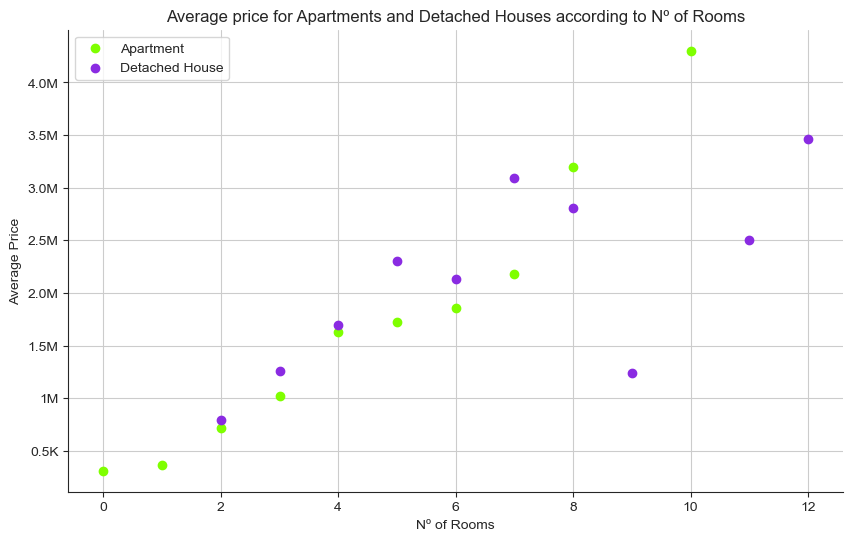

In [116]:
# Filtering data to only obtain avg prices of each category.
pisos = pivot_rooms.loc['piso']
viviendas_independientes = pivot_rooms.loc['vivienda independiente']

# Creating the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(pisos.index, pisos['price'], color='#7fff00', label='Apartment')
plt.scatter(viviendas_independientes.index, viviendas_independientes['price'], color='#8a2be2', label='Detached House')
plt.xlabel('Nº of Rooms')
plt.ylabel('Average Price')
plt.title('Average price for Apartments and Detached Houses according to Nº of Rooms')

plt.gca().set_yticklabels(["0", "0.5K", "1M", "1.5M", "2.0M", "2.5M", "3.0M","3.5M", "4.0M"])

plt.legend()
plt.grid(True)

sns.despine()
plt.show()

* The outlier in apartments with 10 rooms is explained by there is only one listed propertie that is located in Salamanca         district, which explains this very high price.
* The average higher prices in detached houses than in apartments according to the nº of rooms is explained as we saw before due   to the data volume since there are more listed apartmens with lower prices and in many cases only a few listed houses.
* The opposite happens with 8- room detached houses, whereas there are many of them, there's only one listed apartment that       meets the requirements so the average price is higher.

In [135]:
# A data frame I've used to check the results.

df3= df[['district', 'rooms', 'typology', 'price']]

df4= df3.loc[(df3['rooms'] == 8) & (df3['typology'] == 'piso')].sort_values(by='price', ascending = False)
df4

,district,rooms,typology,price
567,Chamberí,8,piso,3200000


### Conclusions

> The higher correlation between the number of bathrooms and the increase in the price of housing rather than the number of       rooms can be understood due to the convenience and comfort they offer. Also, can be a symbol of status and exclusivity. 
  Luxury properties often have a generous amount of bathrooms, which can increase their appeal among wealthy buyers.
  
> The average price of less than 300 thousand that we can find in peripheral areas such as Puente de Vallecas, Carabanchel or     Usera, may be due to general factors such as construction quality, safety and easy access to transportation or other basic       services. 

> In case you are looking for an affordable propertie whose price is not excessive and at the same time you have a quiet life,     and with all type of luxuries near you, a district like Barajas or San Blas-Canillejas may be a great choice; keeping into account that prices are high but not overpriced as other areas in Madrid.

> Finally, it's fair to say that this is just a sample of all properties of Madrid, in many cases there are too few data, which can lead us to jump to conclusions. Nevertheless, it's a great approach of how prices are established in Madrid.

### Sources

>  DB Source:

> https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings
    / Last Updated : 05/03/2024

>  Madrid Choropleth Map Source:

> https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=a4f36d34fa86c410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

> Madrid Districts Source: 

> https://www.madrid.es/portales/munimadrid/es/Inicio/Movilidad-y-transportes/Circulacion-y-aparcamiento/Distritos-y-barrios/?vgnextfmt=default&vgnextoid=5a86befb3fd31810VgnVCM2000001f4a900aRCRD&vgnextchannel=b3128fb9458fe410VgnVCM1000000b205a0aRCRD